## Lemmatization scenarios

## Lambda function creation

## case study


In [1]:
# lemmmatization using nltk

import nltk 

In [2]:
lem = nltk.WordNetLemmatizer()
PS = nltk.PorterStemmer()

In [3]:
# example

print("-------lemmatizing---------")

print(lem.lemmatize("meaning"))
print(lem.lemmatize("meanness"))

print("-------stemming---------")

print(PS.stem("meaning"))
print(PS.stem("meanness"))

-------lemmatizing---------
meaning
meanness
-------stemming---------
mean
mean


In [4]:
# example

print("-------lemmatizing---------")

print(lem.lemmatize("goose"))
print(lem.lemmatize("geese"))

print("-------stemming---------")

print(PS.stem("goose"))
print(PS.stem("geese"))

-------lemmatizing---------
goose
goose
-------stemming---------
goos
gees


In [5]:
# lambda function
# converting upper case string to lower case string

str_list1 = ["Lem","SteM","google"]

func = lambda x: x.lower()
str_list1 = list(map(func,str_list1))

In [6]:
str_list1 = " ".join([word for word in str_list1])
str_list1

'lem stem google'

In [7]:
import wordcloud as wc

In [8]:
wc.WordCloud(str_list1)

(-0.5, 399.5, 199.5, -0.5)

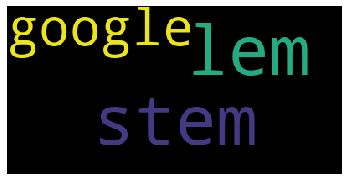

In [9]:
import matplotlib.pyplot as plt

plt.imshow(wc.WordCloud().generate(str_list1))
plt.axis("off")

## case study starts


### steps to be followed
### loading and analyzing data
### preprocessing data
### creating a tf-idf matrix
### prediction model - Random forest
### Scoring/accuracy

In [10]:
# importing relevant modules

import pandas as pd
import numpy as np
import nltk as nlp
import sklearn as sk
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt
#import seaborn as sns

In [11]:
raw_train = pd.read_csv("D:/Python/AI&ML/new term 2 Joyjeet sir/datasets/text_mining/[4]train.tsv", sep = "\t")

In [12]:
raw_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [13]:
raw_test = pd.read_csv("D:/Python/AI&ML/new term 2 Joyjeet sir/datasets/text_mining/[3]test.tsv", sep = "\t")

In [14]:
print(raw_train.shape)
print(raw_train.describe(include = 'all'))
print(raw_test.shape)
print(raw_test.describe(include = 'all'))

(156060, 4)
             PhraseId     SentenceId                       Phrase  \
count   156060.000000  156060.000000                       156060   
unique            NaN            NaN                       156060   
top               NaN            NaN  current terrorism anxieties   
freq              NaN            NaN                            1   
mean     78030.500000    4079.732744                          NaN   
std      45050.785842    2502.764394                          NaN   
min          1.000000       1.000000                          NaN   
25%      39015.750000    1861.750000                          NaN   
50%      78030.500000    4017.000000                          NaN   
75%     117045.250000    6244.000000                          NaN   
max     156060.000000    8544.000000                          NaN   

            Sentiment  
count   156060.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         2.063578  
std          0.

In [15]:
# combining train and test datasets to create a corpus

corpus = pd.concat([raw_train,raw_test],keys = ["train","test"]) # multi-index data frame
corpus.head()

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Phrase  PhraseId  \
train 0  A series of escapades demonstrating the adage ...         1   
      1  A series of escapades demonstrating the adage ...         2   
      2                                           A series         3   
      3                                                  A         4   
      4                                             series         5   

         SentenceId  Sentiment  
train 0           1        1.0  
      1           1        2.0  
      2           1        2.0  
      3           1        2.0  
      4           1        2.0

In [16]:
corpus.shape

(222352, 4)

In [17]:
156060 + 66292

222352

In [18]:
corpus.loc["train"].shape

(156060, 4)

In [19]:
corpus.loc["test"].shape

(66292, 4)

### Some random variable

In [20]:
import string

punct_age = corpus["Phrase"].apply(lambda x: \
                                   round(sum([1 for char in x if char in string.punctuation])/(len(x) - x.count(" ")+.001),3))
comm_len = corpus["Phrase"].apply(lambda x: len(x.split()))
print(punct_age)

train  0        0.013
       1        0.000
       2        0.000
       3        0.000
       4        0.000
                ...  
test   66287    0.091
       66288    0.062
       66289    0.154
       66290    0.083
       66291    0.000
Name: Phrase, Length: 222352, dtype: float64


In [21]:
# clean text
# removing punctuations
# remove stopwords
# tokenisation
# stemming


stops = nlp.corpus.stopwords.words("english")

def clean_text(text):
    text = text.lower()
    # tokenisation and stemming
    text = "".join([char for char in text if char not in string.punctuation])
    text = [PS.stem(tokens) for tokens in text.split() if tokens not in stops]
    return text

clean_text("I am in Mumbai, however I am from DElhi :-)")



['mumbai', 'howev', 'delhi']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidfvector

In [23]:
tfidf_model = tfidfvector(analyzer = clean_text)

In [24]:
tfidf_matrix = tfidf_model.fit(corpus.loc["train","Phrase"]) # sparse matrix

In [25]:
train_matrix = tfidf_model.transform(corpus.loc["train","Phrase"])  

In [68]:
import sys
print(sys.getsizeof(train_matrix))

56


In [26]:
#tfidf_matrix

In [27]:
#temp = pd.DataFrame(tfidf_matrix.toarray(),columns = tfidf_model.get_feature_names())

In [28]:
#temp.head()

### STOP HERE...continuation in next lec

In [29]:
#corpus_upd = corpus.loc["train","Phrase"]
#print(corpus_upd.shape)
#tfidf_matrix_upd = tfidf_model.fit_transform(corpus_upd.loc[:50000]) # used top 50k rows

In [30]:
#tfidf_matrix_upd

In [31]:
#from sklearn.feature_extraction.text import CountVectorizer
# count vectorizer (instead of tfidf we can use count vectorizer)
# added Count vectorizer but we could also work 
#count_vector = CountVectorizer()
#train_counts = count_vector.fit_transform(corpus_upd)
#train_counts.shape

In [32]:
#count_vector.vocabulary_

In [33]:
# term freq
#from sklearn.feature_extraction.text import TfidfTransformer
#tf_transformer = TfidfTransformer(use_idf = False).fit(train_counts)
#train_tf = tf_transformer.transform(train_counts)

## Restarting - 29/08

In [34]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=20)
print(dir(RandomForestClassifier))
RandomForestClassifier

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


sklearn.ensemble._forest.RandomForestClassifier

In [35]:
train_matrix.shape

(156060, 11877)

In [36]:
import scipy

In [37]:
train_matrix = train_matrix.tocsr()

In [38]:
train_matrix

<156060x11877 sparse matrix of type '<class 'numpy.float64'>'
	with 610551 stored elements in Compressed Sparse Row format>

In [39]:
punct_age.shape # punct_age is not dataframe it is a pandas series due to corpus['Phrase']

(222352,)

In [40]:
punct_age_upd = pd.DataFrame(punct_age.loc["train"].values,columns=["Punct_age"]) # converted to dataframe

In [41]:
punct_age_upd.shape

(156060, 1)

In [42]:
comm_len_upd = pd.DataFrame(punct_age.loc["train"].values,columns=["comm_len"])

In [43]:
comm_len_upd

,comm_len
0,0.013
1,0.000
2,0.000
3,0.000
4,0.000
...,...
156055,0.125
156056,0.000
156057,0.000
156058,0.000


In [44]:
# converting punct_age_upd, comm_len_upd and train_matrix into 
# sparse matrix using hstack(horizontal stack)
X_train = scipy.sparse.hstack((train_matrix,punct_age_upd,comm_len_upd))

In [45]:
X_train.shape

(156060, 11879)

In [46]:
rfit = rforest.fit(X_train,corpus.loc["train","Sentiment"])

In [47]:
test_matrix = tfidf_matrix.transform(corpus.loc["test","Phrase"])
# taking test data and converting to tfidf matrix

In [48]:
test_matrix.shape

(66292, 11877)

In [49]:
test_matrix

<66292x11877 sparse matrix of type '<class 'numpy.float64'>'
	with 223414 stored elements in Compressed Sparse Row format>

In [50]:
punct_age_upd_test = pd.DataFrame(punct_age.loc["test"].values,columns=["Punct_age"])
comm_len_upd_test = pd.DataFrame(punct_age.loc["test"].values,columns=["comm_len"])

In [51]:
X_test = scipy.sparse.hstack((test_matrix,punct_age_upd_test,comm_len_upd_test))

In [52]:
X_test.shape

(66292, 11879)

In [53]:
prediction = rfit.predict(X_test)

In [54]:
prediction

array([2., 2., 2., ..., 2., 2., 2.])

(array([6.6274e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8000e+01]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

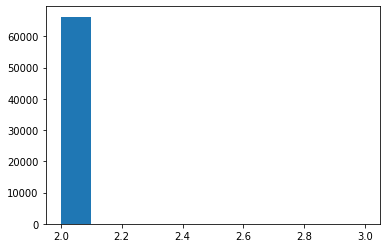

In [55]:
plt.hist(prediction)

In [56]:
# grid search
from sklearn.model_selection import GridSearchCV


In [57]:
# instantiate random forest without parameters
randforest = RandomForestClassifier()
grid_param = {"max_depth" : [50,70,None], 
              "n_estimators" : [10,20]
             }

In [58]:
GSCV_rf_fit = GridSearchCV(randforest,grid_param,cv=5,n_jobs=-1)

In [59]:
GSCV_rf_fit

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [50, 70, None], 'n_estimators': [10, 20]})

In [60]:
GSCV_rf = GSCV_rf_fit.fit(X_train,corpus.loc["train","Sentiment"])

In [61]:
predict_cv = GSCV_rf.predict(X_test)

(array([  791.,     0.,  8045.,     0.,     0., 44534.,     0., 11571.,
            0.,  1351.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

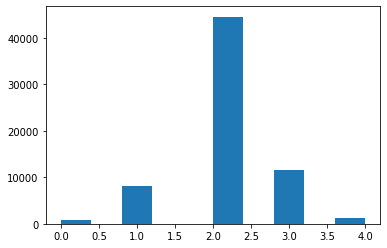

In [62]:
plt.hist(predict_cv)

In [63]:
GSCV_rf.best_estimator_

RandomForestClassifier(n_estimators=20)

In [64]:
GSCV_rf.best_params_

{'max_depth': None, 'n_estimators': 20}